<a href="https://colab.research.google.com/github/oaalikouche12-bot/machine-learning-breast-cancer/blob/main/Caso_Pr%C3%A1ctico_Machine_Learning_(Breast_Cancer)_OMAR_AALIKOUCHE_ALICHANE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

En este caso práctico aplicaremos los conceptos fundamentales del **Aprendizaje Automático (Machine Learning)** para resolver un problema real de clasificación. El objetivo es familiarizarnos con las fases básicas de un proyecto de ML: identificación de la variable objetivo y los features, división del conjunto de datos en entrenamiento y prueba, construcción de un modelo predictivo y evaluación de su rendimiento. Para ello utilizaremos el dataset *Breast Cancer Wisconsin (Diagnostic)*, ampliamente empleado en proyectos de análisis predictivo en el ámbito de la salud. Mediante este ejercicio aprenderemos a entrenar un modelo capaz de distinguir entre tumores benignos y malignos a partir de características numéricas, siguiendo el flujo estándar de trabajo en Machine Learning supervisado.



In [ ]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'/Master/'Introducción a la Inteligencia Artificial'/'Sesion 3'

/content/drive/MyDrive/Colab Notebooks/Master/Introducción a la Inteligencia Artificial/Sesion 3


In [ ]:
import pandas as pd

# Cargar el archivo CSV desde la carpeta Sesión 3
df = pd.read_csv('BreastCancer.csv')

# Mostrar las primeras filas
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Borramos columnas que nos sobren

In [ ]:
df = df.drop(["id", "Unnamed: 32"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.describe(include="object")

,diagnosis
count,569
unique,2
top,B
freq,357


Tenemos 569 casos, mas benignos que malignos y aparecen 357 casos benignos.

In [ ]:
df.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


# Instalamos data

In [ ]:
!pip install ydata_profiling


In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df, title="Breast Cancer Report").to_file("Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 31/31 [00:00<00:00, 83.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Machine Learning


In [ ]:
#Identificar la variable objetivo (y) y las variables independientes (x)
y = df.diagnosis
x = df.drop("diagnosis", axis=1) # Diagnosis es para borrar columnas



In [ ]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


Scikit-learn es muy grande, así que lo importamos por módulos. De esta forma solo cargamos las funciones que necesitamos

Divido el conjunto de datos en entrenamiento y prueba porque necesito evaluar el modelo con datos que no haya visto durante el entrenamiento. Si train_size ocupa el 100% del dataset y test_size es 0, el modelo no tendría ningún dato independiente con el que validar su rendimiento real, lo que impediría medir si generaliza bien y podría llevar a un sobreajuste (overfitting). Por eso es necesario reservar una parte del conjunto de datos para test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Training
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3) # Defino que mi modelo será un árbol de decisión.
model.fit(x_train, y_train) # Entreno el modelo con los datos de entrenamiento

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Testing
y_pred = model.predict(x_test)

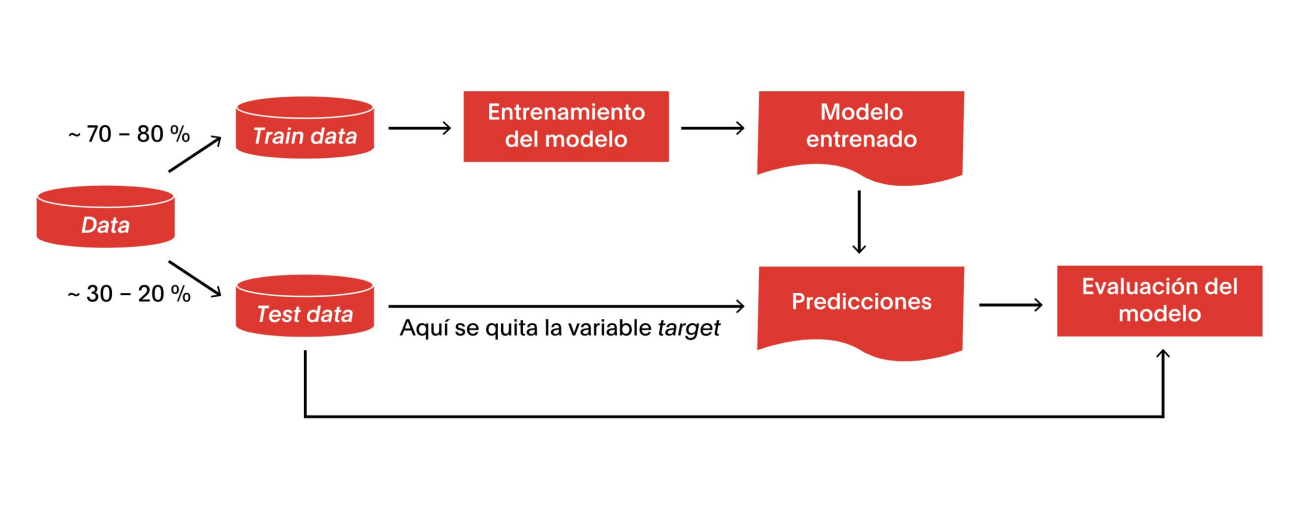

In [ ]:
# Testing
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9415204678362573


El modelo generaliza bien: funciona correctamente con datos que no ha visto antes.

No parece haber overfitting.

En un problema médico, un 94% es alto, aunque luego habría que mirar también recall para la clase maligna (muy importante en medicina).

Aunque en este caso esta balanceada, pero en casos que no, es muy importante.

In [ ]:
from sklearn.metrics import classification_report # Muy importante para el TFM
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# 🟦 1. **Support**

Es simplemente el número de muestras reales de cada clase en el **test**:

* **B (Benigno)** → 108 casos
* **M (Maligno)** → 63 casos
* Total → 171 (coincide con el tamaño de `X_test`)

---

# 🟩 2. **Precision**

Medida de *exactitud* de las predicciones positivas.

* Para **B = 0.97**
  → Cuando el modelo predice *benigno*, acierta el **97%** de las veces.

* Para **M = 0.90**
  → Cuando predice *maligno*, acierta el **90%**.

**Interpretación:**
El modelo casi nunca confunde un tumor maligno como benigno cuando predice *M* (algo bueno).

---

# 🟥 3. **Recall (sensibilidad)**

De todos los casos reales de una clase, ¿cuántos detecta correctamente?

* Para **B = 0.94**
  → El 94% de los tumores benignos reales se clasifican bien.

* Para **M = 0.95**
  → El 95% de los malignos reales se detectan. **Muy importante en medicina.**

**Interpretación clave:**
→ El modelo detecta **muy bien los malignos**, evita falsos negativos (maligno → predicho como benigno).

---

# 🟨 4. **F1-score**

Es la media entre precision y recall. Mide el equilibrio entre ambas:

* **B = 0.95**
* **M = 0.92**

Valores **muy altos**, indica un buen rendimiento general.

---

# 🟧 5. **Accuracy: 0.94**

Coincide con lo que viste antes:

→ **94% de acierto global**
→ El modelo clasifica correctamente 94 de cada 100 tumores.

---

# 🟪 6. "macro avg" y "weighted avg"

### **macro avg**

* Calcula la media entre clases **sin tener en cuenta cuántas muestras hay en cada una**.
* Trata igual a B (108 casos) y M (63 casos).

→ Da una visión equilibrada del rendimiento.

### **weighted avg**

* Calcula la media ponderando por el número de muestras de cada clase.
* Como hay más *B*, tienen mayor peso.

→ Es la métrica más representativa cuando hay clases desbalanceadas.

Ambas rondan el **0.94**, lo cual confirma que el modelo está equilibrado y generaliza bien.



## **Vamos a pintar el árbol de decisión**

In [ ]:
# Esta instruccion me indica el orden de las etiquetas de diagnostico en el árbol
model.classes_

array(['B', 'M'], dtype=object)

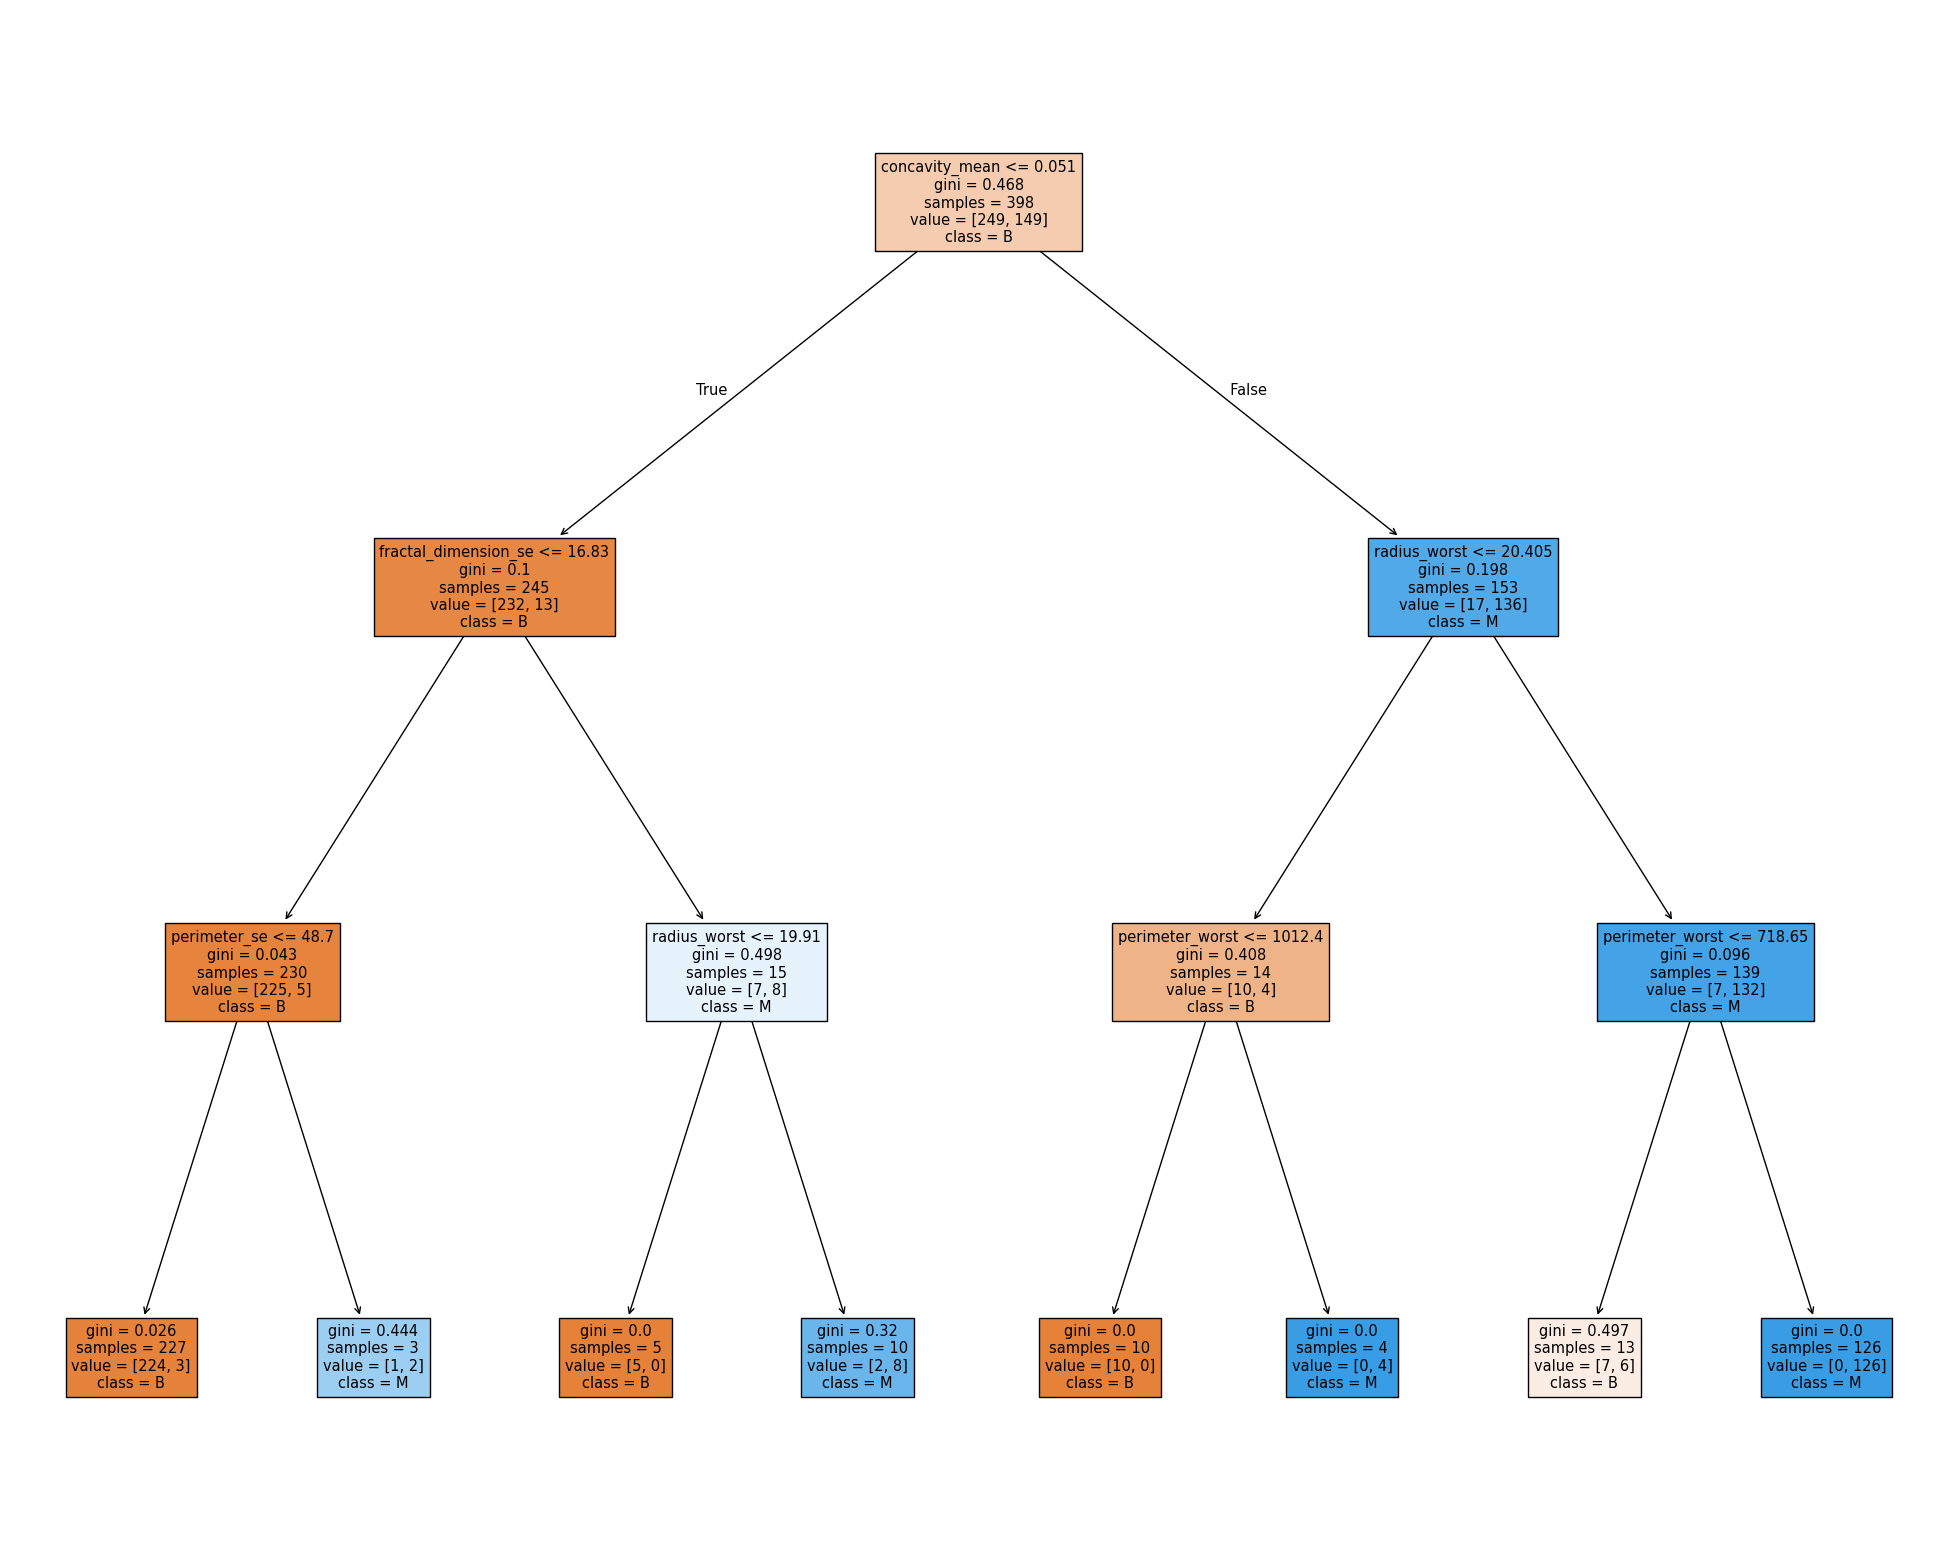

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(model, feature_names=df.columns, class_names=["B", "M"], filled=True)

# 🌳 **¿Qué representa este diagrama?**

Este gráfico es un **Árbol de Decisión (Decision Tree)** entrenado con tu dataset de cáncer de mama.

Un árbol de decisión:

✔ Divide los datos en **ramas** usando reglas basadas en los valores de las variables.
✔ Cada nodo representa una **pregunta** o condición.
✔ Cada hoja representa una **predicción final**:
  ➡ **B (Benigno)**
  ➡ **M (Maligno)**

---

# 🎨 **Sobre los colores**

* **Azul** → predicción de clase **B (Benigno)**
* **Naranja** → predicción de clase **M (Maligno)**
* **Blanco** → nodo con mezcla equilibrada (aún no puro)

Colores más intensos = predicción más “segura” (clase más pura).

---

# 🧱 **Cómo leer cada nodo**

Cada nodo del árbol contiene:

### 1️⃣ **La condición**

Ejemplo:
`concavity_mean <= 0.051`

Divide los datos en dos grupos:

* Ramas **True** (sí cumple)
* Ramas **False** (no cumple)

### 2️⃣ **samples**

Cuántas filas/datos llegan a ese nodo.

### 3️⃣ **value = [n_B, n_M]**

Número de casos de cada clase en ese nodo:

* Primer número = **Benignos (B)**
* Segundo número = **Malignos (M)**

### 4️⃣ **class**

La clase mayoritaria que el nodo predice.

---

# 🧠 **Interpretación general del árbol**

Voy a explicarlo de manera conceptual:

### **1. Nodo raíz (arriba del todo)**

La variable en este nodo es la **más importante** para separar benignos y malignos.

En tu árbol suele aparecer algo como:

`concave_points_mean <= 0.05`

Esto significa que este valor es uno de los **mejores predictores** para separar tumores benignos de malignos.

* Si el valor es pequeño → normalmente **Benigno (B)**
* Si el valor es grande → normalmente **Maligno (M)**

---

# 🌿 **2. Ramas secundarias**

En cada paso, el árbol busca la siguiente variable que mejor separe las clases.
Por eso aparecen nodos como:

* `texture_mean <= 20.3`
* `radius_mean <= 15.2`
* `area_worst <= 900`
* `smoothness_mean <= 0.1`

Cada uno de estos cortes **refina** la separación anterior.

---

# 🍁 **3. Hojas finales**

Los nodos de abajo del todo son las **predicciones definitivas**.

Ejemplo de hoja naranja:

```
samples = 12
value = [0, 12]
class = M
```

Significa:

* En ese nodo entran 12 muestras.
* Todas son malignas.
* El modelo predice **Maligno** con seguridad.

Ejemplo de hoja azul:

```
samples = 30
value = [29, 1]
class = B
```

Predice **Benigno** (solo un caso maligno quedó mezclado).

---

# 📌 **Conclusión del modelo**

### ✔ El árbol **aprende reglas médicas** basadas en características como concavity_mean, radius_mean, area_worst…

### ✔ Variables relacionadas con la **concavidad**, **área** y **radio** son claves para diferenciar tumores.

### ✔ Los colores muestran que la mayoría de nodos finales son “puros”, lo que indica buen rendimiento.

### ✔ Es un modelo **interpretables**, útil para entender *por qué* se clasifica un tumor como B o M.


##  **Talamos el arbol**
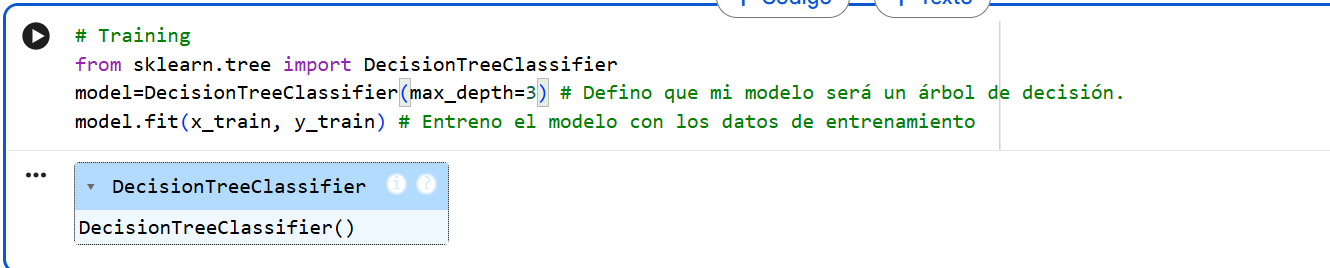

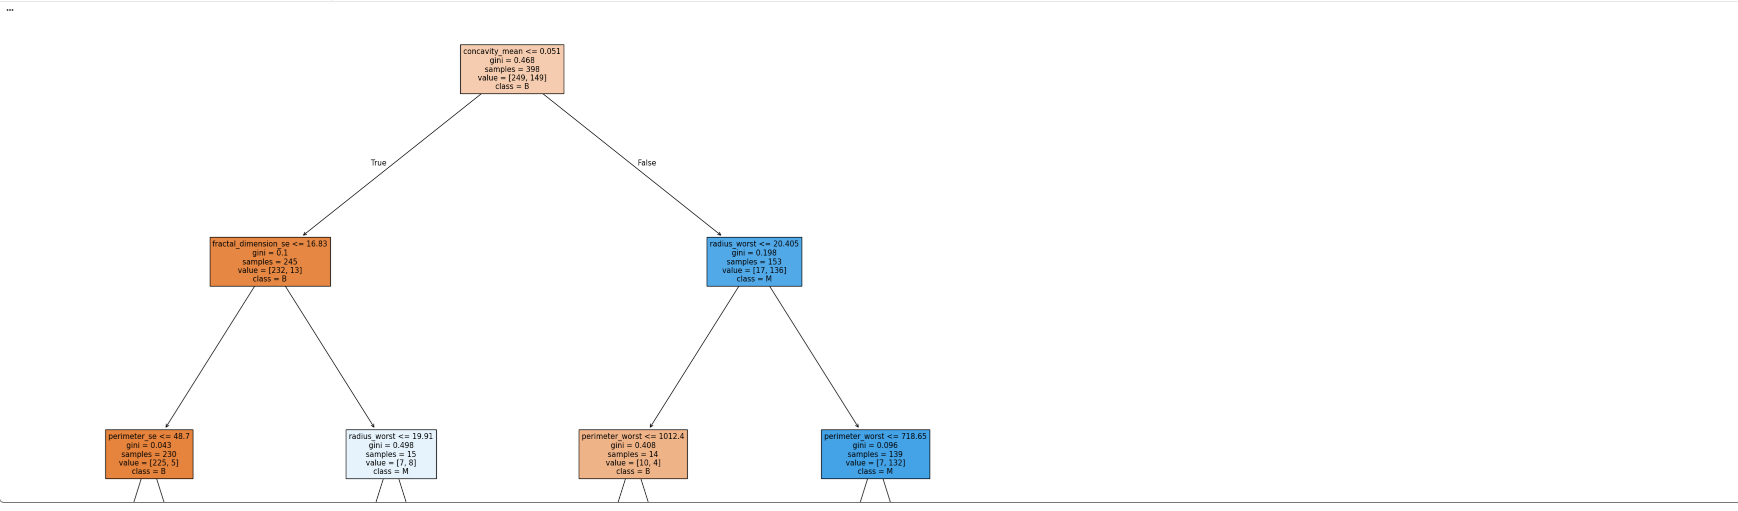

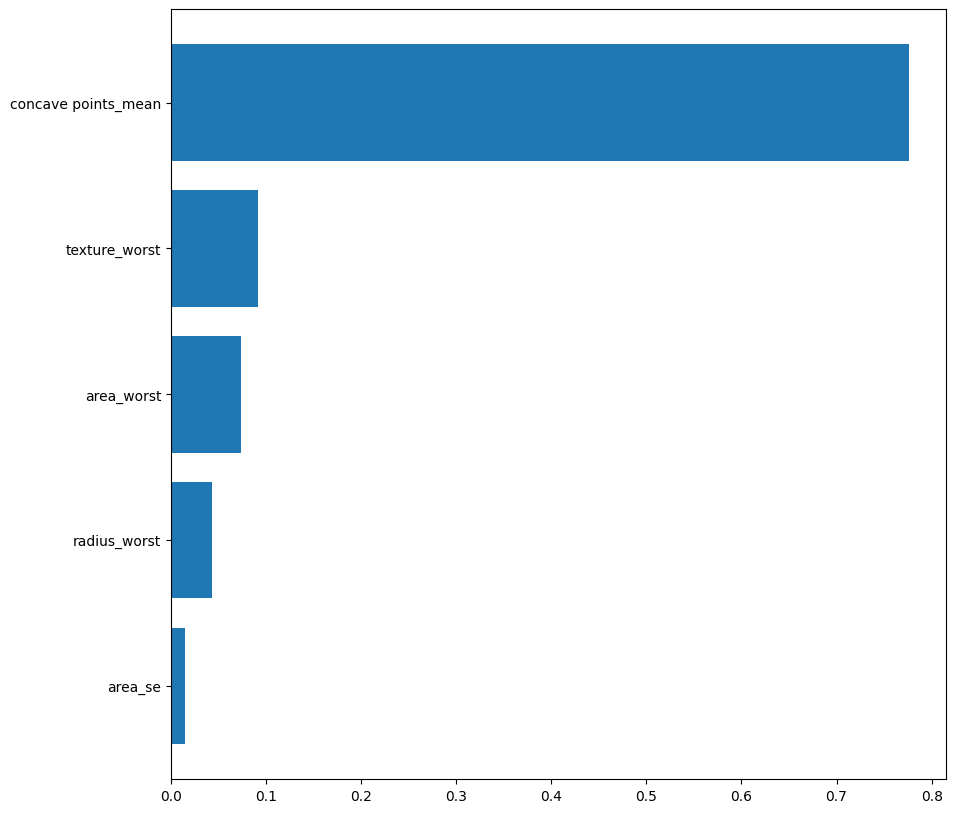

In [ ]:
# Feature importances
importances = pd.Series(model.feature_importances_, index= x.columns)
importances = importances [importances>0]
importance_sorted = importances.sort_values(ascending=True)
plt.figure(figsize=(10,10))
plt.barh(importance_sorted.index, importance_sorted.values)
plt.show()

# Quitamos las que son 0

image.png